## Probability Assignment DS

In [71]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(42)

### Q1(a)  
Experimental probability of getting heads and tails in 10000 coin flips is almost equal to 0.5

In [72]:
# 1(a)
heads = 0
tails = 0
# Simulate 10,000 coin flips
# Count the number of heads and tails
for i in range(10000):
    # Simulate a coin flip
    # 0 for heads, 1 for tails
    if random.randint(0, 1) == 0:
        heads += 1
    else:
        tails += 1
prob_heads = heads / 10000
prob_tails = tails / 10000
print(f"Probability of heads: {prob_heads:.4f}")
print(f"Probability of tails: {prob_tails:.4f}")

Probability of heads: 0.4984
Probability of tails: 0.5016


### Q1(b)  
Experimental probability of getting sum of 7 in rolling two dice is 0.1704 which is close to theoretical probability of 0.167.

In [77]:
# 1(b)
random.seed(42)  # Reset seed for reproducibility
sum_7 = 0
# Simulate rolling two dice and checking for a sum of 7
# Repeat this 10000 times
for j in range(10000):
    sum = 0
    # Roll two dice
    for i in range(2):
        outcome = random.randint(1, 6)
        sum += outcome
    if sum == 7:
        sum_7 += 1

prob_sum_7 = sum_7 / 10000
print(f"Probability of rolling a sum of 7: {prob_sum_7:.4f}")


Probability of rolling a sum of 7: 0.1704


### Q2
Experimental probaility of getting at least one 6 in rolling die 10 times is around 0.8401. The theoretical probability is 1 - (5/6)^10 which is around 0.8384

In [79]:
# 2
random.seed(42)  # Reset seed for reproducibility
success = 0
# Simulate rolling a die 10 times and checking if at least one roll is a 6
# Repeat this 10000 times
for j in range(10000):
    outcomes = []
    # Roll a die 10 times
    for i in range(10):
        outcome = random.randint(1, 6)
        outcomes.append(outcome)
    if 6 in outcomes:
        success += 1
prob_six = success / 10000
print(f"Probability of rolling at least one 6 in 10 rolls: {prob_six:.4f}")

Probability of rolling at least one 6 in 10 rolls: 0.8401


### Q3
Theoretical probabilities:  
P(R) = 5/20  = 0.25  
P(B) = 8/20 = 0.40  
Since balls are drawn with replacement, every draw becomes indepedent of each other. Thus conditional probabilities  
P(R|B) = P(R) = 0.25  
P(B|R) = P(B) = 0.40  


In [ ]:
# 3
def simulate(n_draws=1000, seed=42):
    """
    Simulate n_draws with replacement from a bag containing:
    5 red (R), 7 green (G), and 8 blue (B) balls.
    
    Returns:
        P(R|B), P(B|R), P(R), P(B), Bayes_RHS
    """
    np.random.seed(seed)
    colors = ['R']*5 + ['G']*7 + ['B']*8
    draws = np.random.choice(colors, size=n_draws, replace=True)
    
    prev = draws[:-1]     # previous draw (except first)
    nxt  = draws[1:]      # current draw (shifted by one)
    
    # Probability of red given previous blue
    mask_prev_blue = prev == 'B'
    prob_R_given_B = np.mean(nxt[mask_prev_blue] == 'R')
    
    # Probability of blue given previous red
    mask_prev_red = prev == 'R'
    prob_B_given_R = np.mean(nxt[mask_prev_red] == 'B')
    
    # Unconditional probabilities
    prob_R = np.mean(draws == 'R')
    prob_B = np.mean(draws == 'B')
    
    # Bayes theorem right‑hand side
    bayes_rhs = prob_B_given_R * prob_R / prob_B
    
    return {
        "P(R|B) (simulated)": prob_R_given_B,
        "P(B|R) (simulated)": prob_B_given_R,
        "P(R) (simulated)": prob_R,
        "P(B) (simulated)": prob_B,
        "Bayes RHS": bayes_rhs,
        "Difference": abs(prob_R_given_B - bayes_rhs)
    }

# Run the simulation for 1 000 draws
results_1k = simulate(n_draws=1000, seed=42)

# For better convergence, also run a larger simulation
results_100k = simulate(n_draws=100000, seed=1)

print("=== Simulation with 1,000 draws ===")
for k, v in results_1k.items():
    print(f"{k:22}: {v:.4f}")

print("\n=== Simulation with 100,000 draws ===")
for k, v in results_100k.items():
    print(f"{k:22}: {v:.4f}")


=== Simulation with 1,000 draws ===
P(R|B) (simulated)    : 0.2630
P(B|R) (simulated)    : 0.4028
P(R) (simulated)      : 0.2890
P(B) (simulated)      : 0.3840
Bayes RHS             : 0.3031
Difference            : 0.0401

=== Simulation with 100,000 draws ===
P(R|B) (simulated)    : 0.2473
P(B|R) (simulated)    : 0.3992
P(R) (simulated)      : 0.2477
P(B) (simulated)      : 0.3994
Bayes RHS             : 0.2475
Difference            : 0.0002


### 4
Theoretical mean = 1x0.25 + 2x0.35 + 3x0.4 = 2.15

In [80]:
# 4
random.seed(42)  # Reset seed for reproducibility
# Simulate a sample of 1000 draws from a discrete distribution with given probabilities
sample = np.random.choice(a=[1,2,3],size=1000,p=[0.25,0.35,0.4])
sample_mean = np.mean(sample)
sample_std = np.std(sample)  # Sample standard deviation
sample_var = sample_std ** 2  # Sample variance
print(f"Sample mean: {sample_mean:.4f}")
print(f"Sample standard deviation: {sample_std:.4f}")
print(f"Sample variance: {sample_var:.4f}")

Sample mean: 2.1530
Sample standard deviation: 0.7871
Sample variance: 0.6196


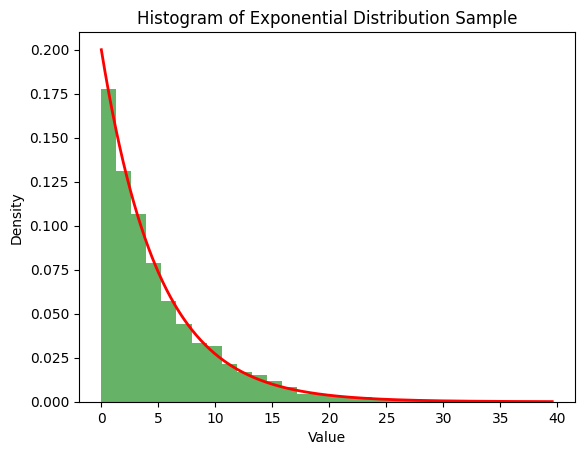

In [81]:
# 5
from scipy.stats import expon
random.seed(42)  # Reset seed for reproducibility
sample = np.random.exponential(scale=5, size=2000)

# Plot theoretical PDF
x = np.linspace(0, np.max(sample), 500)
pdf = expon.pdf(x, scale=5)
plt.plot(x, pdf, 'r-', label='Exponential PDF', linewidth=2)

# Plot histogram of the sample
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histogram of Exponential Distribution Sample')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


### 6
Distribution of sample mean is approximately normal distribution with bell shape curve.

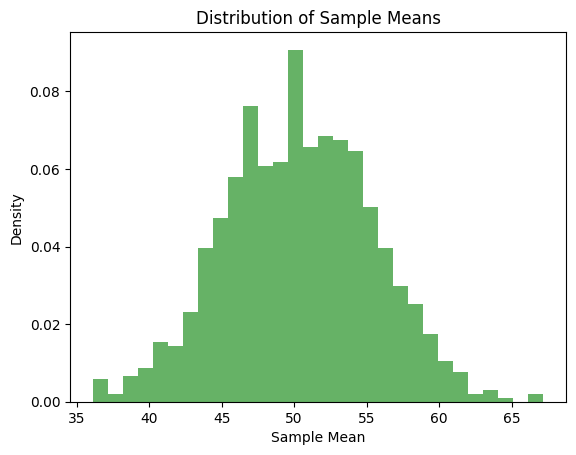

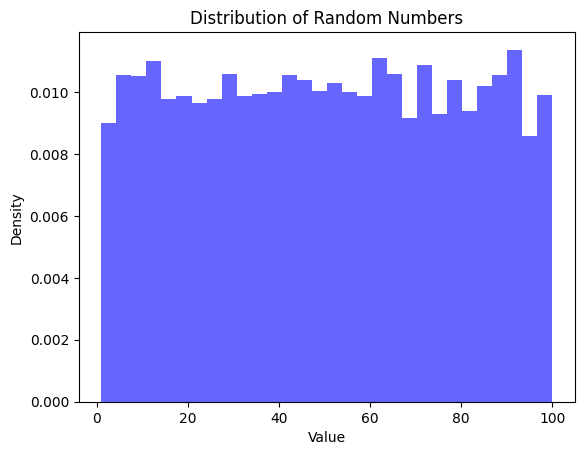

In [82]:
# 6
random.seed(42)  # Reset seed for reproducibility
nummbers = np.random.uniform(low=1, high=100, size=10000)
sample_means = []
for i in range(1000):
    sample = np.random.choice(nummbers, size=30, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# Plot histogram of sample means
plt.hist(sample_means, bins=30, density=True, alpha=0.6, color='g')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

# Plot distribution of random numbers
plt.figure()
plt.hist(nummbers, bins=30, density=True, alpha=0.6, color='b')
plt.title('Distribution of Random Numbers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()